In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('ds_salaries.csv')

In [3]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [22]:
df.shape

(607, 12)

In [4]:
df.salary.describe()

count    6.070000e+02
mean     3.240001e+05
std      1.544357e+06
min      4.000000e+03
25%      7.000000e+04
50%      1.150000e+05
75%      1.650000e+05
max      3.040000e+07
Name: salary, dtype: float64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14328\118205992.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['salary'])


<Axes: xlabel='salary', ylabel='Density'>

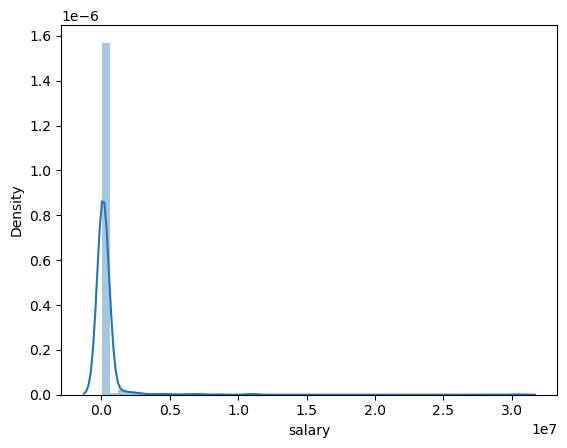

In [5]:
sns.distplot(df['salary'])

<Axes: >

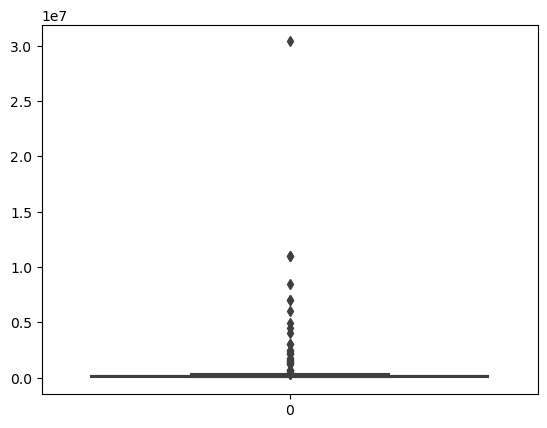

In [6]:
sns.boxplot(df['salary'])

In [10]:
percentile75=df['salary'].quantile(0.75)
percentile75

165000.0

In [12]:
percentile25=df['salary'].quantile(0.25)
percentile25

70000.0

In [14]:
iqr=percentile75-percentile25
iqr

95000.0

In [15]:
upper_limit=percentile75+1.5*iqr
upper_limit

307500.0

In [16]:
lower_limit=percentile25-1.5*iqr
lower_limit

-72500.0

In [18]:
#finding the outliers

df[(df['salary']>upper_limit) |(df['salary']<lower_limit) ]

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
11,11,2020,MI,FT,Data Scientist,3000000,INR,40481,IN,0,IN,L
16,16,2020,EN,FT,Data Engineer,4450000,JPY,41689,JP,100,JP,S
18,18,2020,EN,FT,Data Science Consultant,423000,INR,5707,IN,50,IN,M
21,21,2020,MI,FT,Product Data Analyst,450000,INR,6072,IN,100,IN,L
25,25,2020,EX,FT,Director of Data Science,325000,USD,325000,US,100,US,L
27,27,2020,SE,FT,Data Engineer,720000,MXN,33511,MX,0,MX,S
33,33,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M
50,50,2020,EN,FT,Data Analyst,450000,INR,6072,IN,0,IN,S
63,63,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L


# Trimming

In [20]:
#Trimming outliers
new_df=df[(df['salary']<upper_limit) & (df['salary']>lower_limit)]

In [23]:
new_df.shape

(563, 12)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14328\118205992.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['salary'])


<Axes: xlabel='salary', ylabel='Density'>

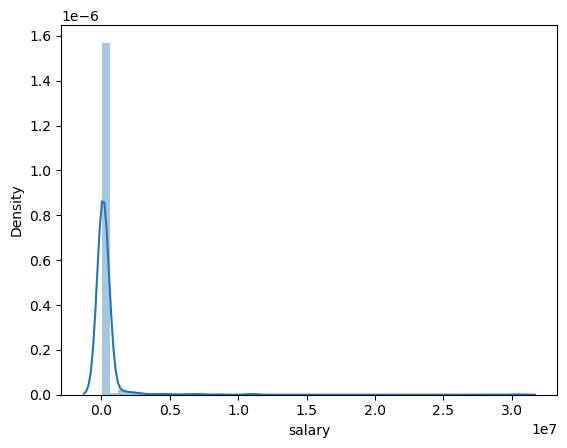

In [24]:
sns.distplot(df['salary'])

<Axes: >

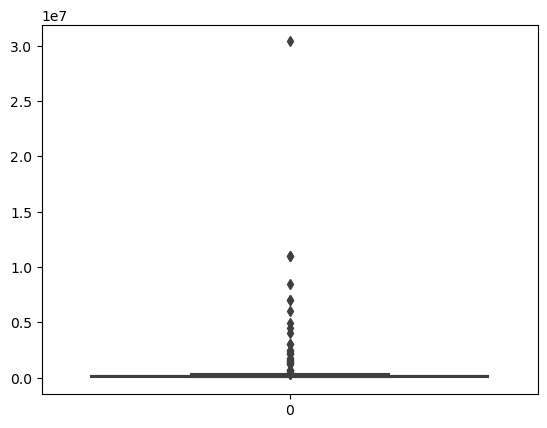

In [25]:
sns.boxplot(df['salary'])

# capping

In [26]:
df['salary']=np.where(df['salary']>=upper_limit,
                     upper_limit,
                     np.where(df['salary']<=lower_limit,
                             lower_limit,
                             df['salary']))


In [27]:
df.shape

(607, 12)

In [28]:
df['salary'].describe()

count       607.000000
mean     127196.113674
std       76247.922230
min        4000.000000
25%       70000.000000
50%      115000.000000
75%      165000.000000
max      307500.000000
Name: salary, dtype: float64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14328\4014152250.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['salary'])


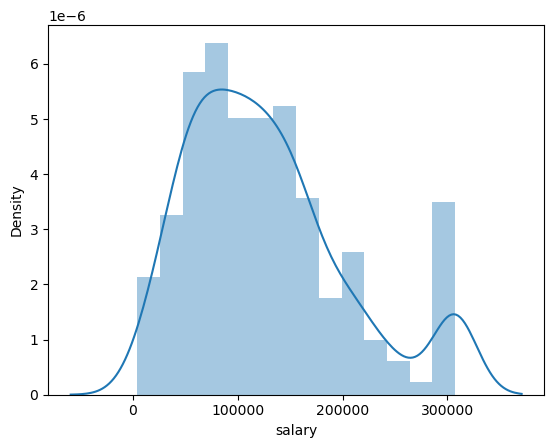

In [29]:
sns.distplot(df['salary'])
plt.show()

<Axes: >

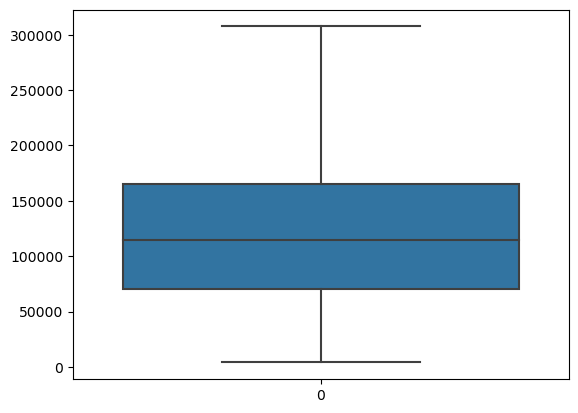

In [30]:
sns.boxplot(df['salary'])

insight : above boxplot there are no outliers 